In [1]:
from sklearn import datasets
digits= datasets.load_digits()

<Figure size 640x480 with 0 Axes>

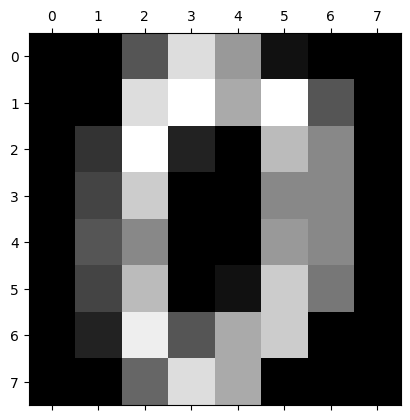

In [2]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()



In [3]:
digits.data.shape

(1797, 64)

Covarianz Matrix

In [7]:
import numpy as np

In [8]:
covar = np.matmul(np.transpose(digits.data),digits.data)
covar

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.64400e+03, 7.15400e+03, ..., 3.40600e+03,
        1.30600e+03, 6.60000e+01],
       [0.00000e+00, 7.15400e+03, 8.92850e+04, ..., 6.11890e+04,
        2.18770e+04, 4.72000e+03],
       ...,
       [0.00000e+00, 3.40600e+03, 6.11890e+04, ..., 1.44749e+05,
        5.32400e+04, 9.59500e+03],
       [0.00000e+00, 1.30600e+03, 2.18770e+04, ..., 5.32400e+04,
        3.77360e+04, 9.83300e+03],
       [0.00000e+00, 6.60000e+01, 4.72000e+03, ..., 9.59500e+03,
        9.83300e+03, 6.45300e+03]])

Basiswechselmatrix

In [7]:
# Wir müssen die Daten zentrieren
digits_centered = digits.data - digits.data.mean(axis=0)
U, s, Vt = np.linalg.svd(digits_centered, full_matrices=True)

In [24]:
U.shape, s.shape, Vt.shape

((1797, 1797), (64,), (64, 64))

In [8]:
smat = np.zeros((1797,64))
smat[:64, :64] = np.diag(s)

In [9]:
np.allclose(digits_centered, U @ smat @Vt)

True

Projektion

In [27]:
Vt.shape

(64, 64)

In [28]:
projection_matrix = Vt.T[:, :2]
projected_data = digits_centered @ projection_matrix

Mit scikit learn

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(digits.data)

In [30]:
projected_data

array([[  1.25946645, -21.27488348],
       [ -7.9576113 ,  20.76869896],
       [ -6.99192297,   9.95598641],
       ...,
       [-10.8012837 ,   6.96025223],
       [  4.87210009, -12.42395362],
       [  0.34438963,  -6.36554919]])

In [31]:
X2D

array([[ -1.25946948,  21.27488301],
       [  7.95761573, -20.76869878],
       [  6.99192272,  -9.95598728],
       ...,
       [ 10.80127818,  -6.96025092],
       [ -4.87209361,  12.42394617],
       [ -0.34439871,   6.36554903]])

Explained variance

In [32]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [33]:
pca = PCA(n_components=0.95)
digits_max_variance = pca.fit_transform(digits.data)
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [34]:
digits_max_variance.shape

(1797, 29)

Rekonstruktion

In [35]:
digits_reconstructed = pca.inverse_transform(X2D)

ValueError: shapes (1797,2) and (29,64) not aligned: 2 (dim 1) != 29 (dim 0)

In [36]:

plt.gray()
plt.matshow(digits_reconstructed[1].reshape((8,8)))

plt.matshow(digits.images[1])

plt.show()

NameError: name 'digits_reconstructed' is not defined

<Figure size 640x480 with 0 Axes>

Kernel PCA

In [37]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

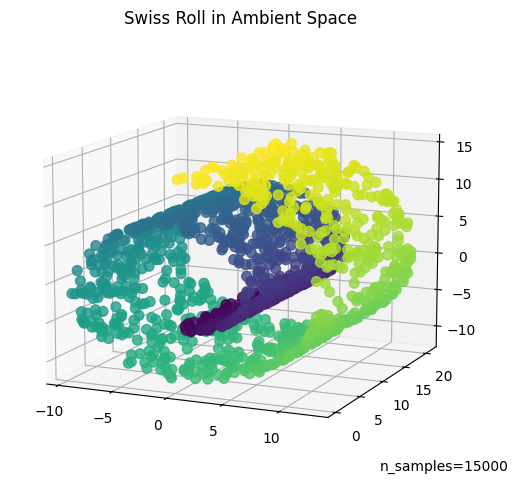

In [38]:
fig = plt.figure(figsize=(8, 6))
plt.set_cmap('viridis')
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=15000", transform=ax.transAxes)

In [39]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(
    n_components=2,
    kernel='rbf',
    gamma=0.2
)

In [40]:
sr_points_2d = kpca.fit_transform(sr_points)

Text(0.5, 1.0, 'Swiss Roll in 2d')

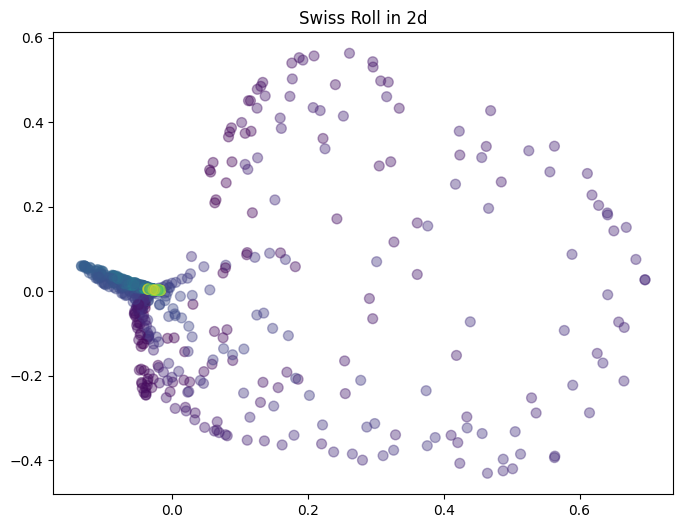

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.add_axes(ax)
ax.scatter(
    sr_points_2d[:, 0], sr_points_2d[:, 1], c=sr_color, s=50, alpha=0.4
)
ax.set_title("Swiss Roll in 2d")

Random Projection

In [64]:

from sklearn import random_projection
rand_proj = random_projection.GaussianRandomProjection(
    #n_components=10,
    compute_inverse_components=True
)
digits_random_projection = rand_proj.fit_transform(digits.data)

ValueError: eps=0.100000 and n_samples=1797 lead to a target dimension of 6423 which is larger than the original space with n_features=64

<Figure size 640x480 with 0 Axes>

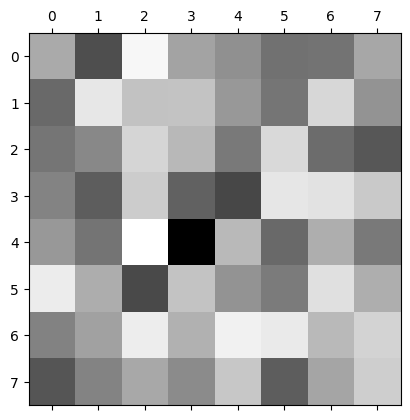

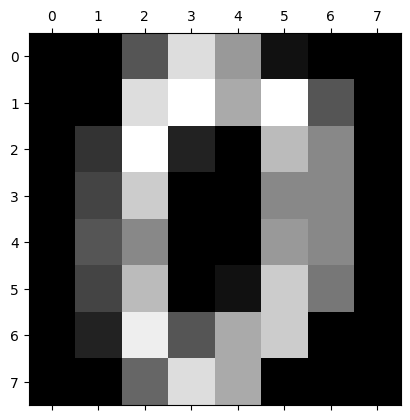

In [63]:
digits_random_reconstruction = rand_proj.inverse_transform(digits_random_projection)
plt.gray()
plt.matshow(digits_random_reconstruction[0].reshape((8,8)))

plt.matshow(digits.images[0])

plt.show()

Jetzt vollen MNIST Datensatz

In [65]:
import gzip
with gzip.open('../Data/train-images-idx3-ubyte.gz', 'rb') as f:
    mnist= np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

In [66]:
mnist.shape

(60000, 784)

In [70]:
rand_proj = random_projection.GaussianRandomProjection(
    n_components=300,
    compute_inverse_components=True
)
full_mnist_random_projection = rand_proj.fit_transform(mnist)

<Figure size 640x480 with 0 Axes>

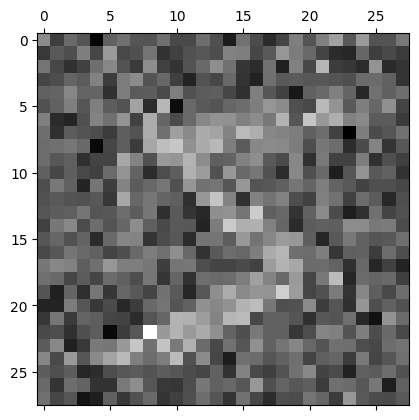

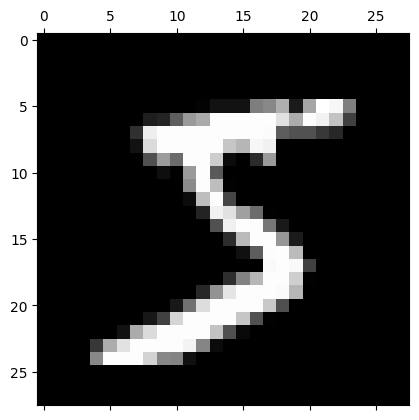

In [71]:
full_mnist_random_reconstruction = rand_proj.inverse_transform(full_mnist_random_projection)
plt.gray()
plt.matshow(full_mnist_random_reconstruction[0].reshape((28,28)))

plt.matshow(mnist[0].reshape(28,28))

plt.show()

Isomap

In [57]:
from sklearn.manifold import Isomap

In [58]:
embedding = Isomap(
    n_components=2,
    n_neighbors=6
)

In [59]:
isomap_output = embedding.fit_transform(sr_points)

Text(0.5, 1.0, 'Swiss Roll with isomap')

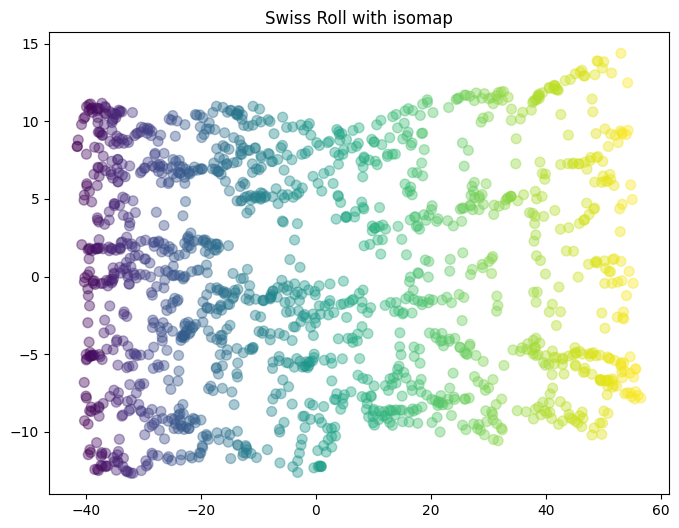

In [61]:
fig = plt.figure(figsize=(8, 6))
plt.set_cmap('viridis')
ax = fig.add_subplot(111)
fig.add_axes(ax)
ax.scatter(
    isomap_output[:, 0], isomap_output[:, 1], c=sr_color, s=50, alpha=0.4
)
ax.set_title("Swiss Roll with isomap")

T-SNE

In [54]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    random_state=0,
    perplexity=30
)

In [55]:
digits_tsne = tsne.fit_transform(
    digits.data[:500]
)

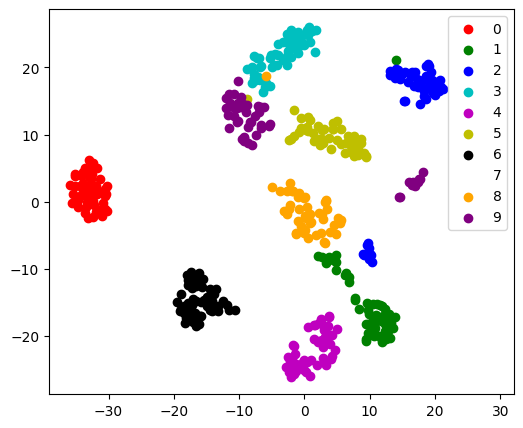

In [56]:
target_ids = range(len(digits.target_names))
y = digits.target[:500]
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(digits_tsne[y == i, 0], digits_tsne[y == i, 1], c=c, label=label)
plt.legend()
plt.show()